#Integrantes: Paula Daniela Morales-María Camila Ruiz-Juan Andrés Vargas

# **Planteamiento del problema**
En 2006 se evidenció que en Estados Unidos la población de abejas disminuyó, por consiguiente la producción de miel en este país también lo hizo, por esta razón se analizó como ha sido el el proceso de producción de miel en las diferentes granjas en un periodo de 1998-2012.

Como parte del equipo de planeación financiera, se desea invertir en más colonias de manera que se pueda maximizar la producción probable en las granjas que se tienen localizadas en los estados de Alabamas, Florida, Arizona y Texas. Para esto, se debe tener en cuenta que para la creación de una colonia en cada estado se manejan diferentes costos. La empresa firma un contrato con una ferretería para fijar el precio de los materiales que se van a usar, y como somos clientes habituales, el precio pactado fue de $165 USD por colonia.

## Costos de los componentes de una colonia:
Alabamas: $120USD 

Florida: $108USD

Arizona: $104USD

Texas: $100USD

## Costos de las abejas por colonia 

Alabamas: $140USD 

Florida: $206USD

Arizona: $152USD

Texas: $215USD

Teniendo en cuenta lo mencionado anteriormente, se porpóne las siguientes ecuaciones para optimizar la producción:


$$ Max73.93X_1+83.06X_2,83.06X_3,83.06X_4$$
$$ 120X_1+108X_2+104X_3+100X_4 \leq 5000$$
$$ 140X_1+206X_2+152X_3+215X_4 \leq 2000$$
$$ 165X_1+165X_2+165X_3+165X_4 \leq 5500$$

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import norm
!pip install yfinance
import yfinance as yf
from scipy.optimize import minimize
from scipy.optimize import linprog
from sklearn.datasets import make_blobs

In [ ]:
#AL
!wget https://raw.githubusercontent.com/juandres24/miel/main/honeyproduction.csv 

--2022-05-16 16:27:50--  https://raw.githubusercontent.com/juandres24/miel/main/honeyproduction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 642 [text/plain]
Saving to: ‘honeyproduction.csv.2’

honeyproduction.csv 100%[===================>]     642  --.-KB/s    in 0s      

2022-05-16 16:27:50 (34.6 MB/s) - ‘honeyproduction.csv.2’ saved [642/642]



In [ ]:
#FL
!wget https://raw.githubusercontent.com/juandres24/florida/main/honeyproduction.csv

--2022-05-16 16:27:50--  https://raw.githubusercontent.com/juandres24/florida/main/honeyproduction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 767 [text/plain]
Saving to: ‘honeyproduction.csv.3’

honeyproduction.csv 100%[===================>]     767  --.-KB/s    in 0s      

2022-05-16 16:27:50 (64.7 MB/s) - ‘honeyproduction.csv.3’ saved [767/767]



In [ ]:
#AR
!wget https://raw.githubusercontent.com/juandres24/arizona/main/Arizona.csv

--2022-05-16 16:27:50--  https://raw.githubusercontent.com/juandres24/arizona/main/Arizona.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 713 [text/plain]
Saving to: ‘Arizona.csv’

Arizona.csv         100%[===================>]     713  --.-KB/s    in 0s      

2022-05-16 16:27:50 (28.2 MB/s) - ‘Arizona.csv’ saved [713/713]



In [ ]:
#Tx
!wget https://raw.githubusercontent.com/juandres24/Tx/main/Texas.csv 

--2022-05-16 16:27:51--  https://raw.githubusercontent.com/juandres24/Tx/main/Texas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘Texas.csv’

Texas.csv           100%[===================>]     723  --.-KB/s    in 0s      

2022-05-16 16:27:51 (35.8 MB/s) - ‘Texas.csv’ saved [723/723]



In [ ]:
from IPython.core.display import Math
dfal = pd.read_csv("Arizona.csv",delimiter=';').dropna()#.values
dfAL = pd.DataFrame(dfal)
dfAL

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,53000,65,3445000,1688000,0.59,2033000
1,1999,52000,89,4628000,2592000,0.53,2453000
2,2000,52000,93,4836000,3337000,0.57,2757000
3,2001,50000,98,4900000,1617000,0.65,3185000
4,2002,45000,88,3960000,871000,1.26,4990000
5,2003,40000,75,3000000,810000,1.26,3780000
6,2004,40000,57,2280000,388000,0.87,1984000
7,2005,36000,69,2484000,571000,0.97,2409000
8,2006,32000,76,2432000,730000,0.89,2164000
9,2007,28000,80,2240000,672000,0.95,2128000


In [ ]:
from IPython.core.display import Math
dffl = pd.read_csv("honeyproduction.csv.1",delimiter=';').dropna()#.values
dfFL = pd.DataFrame(dffl)
dfFL

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,230000.0,98,22540000,4508000,0.64,14426000
1,1999,228000.0,102,23256000,4186000,0.53,12326000
2,2000,232000.0,105,24360000,2923000,0.54,13154000
3,2001,220000.0,100,22000000,3432000,0.64,14080000
4,2002,220000.0,93,20460000,2026000,1.14,23324000
5,2003,210000.0,71,14910000,1491000,1.32,19681000
6,2004,205000.0,98,20090000,2009000,1.02,20492000
7,2005,160000.0,86,13760000,2477000,0.87,11971000
8,2006,170000.0,81,13770000,1790000,1.00,13770000
9,2007,160000.0,71,11360000,1363000,0.99,11246000


In [ ]:
dfar = pd.read_csv("honeyproduction.csv.1",delimiter=';').dropna()#.values
dfAR = pd.DataFrame(dfar)
dfAR

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,230000.0,98,22540000,4508000,0.64,14426000
1,1999,228000.0,102,23256000,4186000,0.53,12326000
2,2000,232000.0,105,24360000,2923000,0.54,13154000
3,2001,220000.0,100,22000000,3432000,0.64,14080000
4,2002,220000.0,93,20460000,2026000,1.14,23324000
5,2003,210000.0,71,14910000,1491000,1.32,19681000
6,2004,205000.0,98,20090000,2009000,1.02,20492000
7,2005,160000.0,86,13760000,2477000,0.87,11971000
8,2006,170000.0,81,13770000,1790000,1.00,13770000
9,2007,160000.0,71,11360000,1363000,0.99,11246000


In [ ]:
from IPython.core.display import Math
dftx = pd.read_csv("honeyproduction.csv.1",delimiter=';').dropna()#.values
dfTX = pd.DataFrame(dftx)
dfTX

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,1998,230000.0,98,22540000,4508000,0.64,14426000
1,1999,228000.0,102,23256000,4186000,0.53,12326000
2,2000,232000.0,105,24360000,2923000,0.54,13154000
3,2001,220000.0,100,22000000,3432000,0.64,14080000
4,2002,220000.0,93,20460000,2026000,1.14,23324000
5,2003,210000.0,71,14910000,1491000,1.32,19681000
6,2004,205000.0,98,20090000,2009000,1.02,20492000
7,2005,160000.0,86,13760000,2477000,0.87,11971000
8,2006,170000.0,81,13770000,1790000,1.00,13770000
9,2007,160000.0,71,11360000,1363000,0.99,11246000


In [ ]:
Rend = pd.DataFrame([dfAL['yieldpercol'].mean(), dfFL['yieldpercol'].mean(),dfAR['yieldpercol'].mean(),dfTX['yieldpercol'].mean()],['AL','Fl','AR','TX'])
Rend

,0
AL,73.933333
Fl,83.066667
AR,83.066667
TX,83.066667


In [ ]:
#costos de producción
import random
abejas = random.sample(range(120,295), 4)
print(abejas)

componentes = random.sample(range(94,138), 4)
print(componentes)

[140, 206, 152, 215]
[120, 108, 104, 100]


In [ ]:
# Parametros de la función objetivo
c = np.array([73.93,83.06,83.06,83.06])

# Restricciones de desigualdad
A = np.array([[140,206,152,215],[120,108,104,100],[165,165,165,165]])
b= np.array([2000,5000,5500])

# Solución del problema
sol = linprog(-c, A_ub=A, b_ub=b, method='revised simplex')#se pone method para especificarle revised simplex, sin method lo hace por punto interior automaticamente.
sol

     con: array([], dtype=float64)
     fun: -1092.8947368421054
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([-2.27373675e-13,  3.63157895e+03,  3.32894737e+03])
  status: 0
 success: True
       x: array([ 0.        ,  0.        , 13.15789474,  0.        ])

la producción se logra maximizar invirtiendo en 13 colonias en el estado de Arizona. De esta manera la producción total logra alcanzar 1092,89 Lbs de miel.

# Costo total de producción con Monte Carlo 

## Costo de los componenetes de la colmena

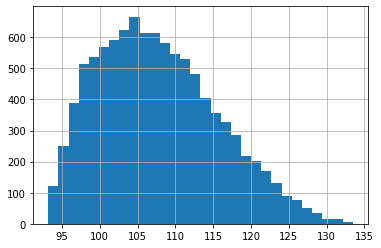

In [ ]:
def betapert(a, b, c, *, size=1, lamb=4):
    d = c - a
    alpha = 1 + lamb * (b - a) / d
    beta = 1 + lamb * (c - b) / d
    return a + np.random.beta(alpha, beta, size=size) * d

componentes = betapert(93,104,137, size=10000)
pd.Series(componentes).hist(bins=30);

In [ ]:
CT = componentes*13
CT

array([1614.88514189, 1326.5656564 , 1544.24464078, ..., 1240.12710856,
       1291.17160597, 1464.92868685])

In [ ]:
pd.Series(CT).describe()

count    10000.000000
mean      1400.014719
std        102.189258
min       1211.462987
25%       1320.187118
50%       1389.606538
75%       1467.897050
max       1734.734572
dtype: float64

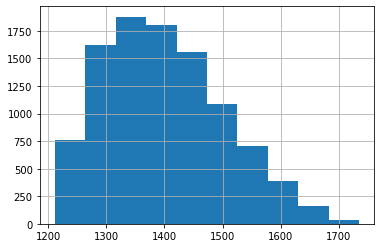

In [ ]:
pd.Series(CT).hist()

## Costo de las abejas

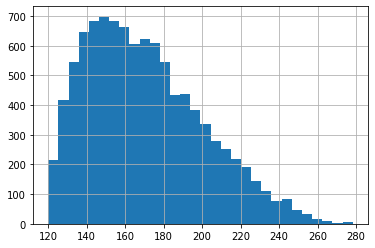

In [ ]:
abejas = betapert(120,152,295, size=10000) 
pd.Series(abejas).hist(bins=30); 

In [ ]:
AT=abejas*13
AT

array([1863.76250931, 2028.7628799 , 2680.91158148, ..., 2384.17179857,
       2540.51330335, 2397.3176276 ])

In [ ]:
pd.Series(AT).describe()

count    10000.000000
mean      2214.514973
std        391.108915
min       1561.374599
25%       1903.199046
50%       2160.428283
75%       2467.887363
max       3616.953188
dtype: float64

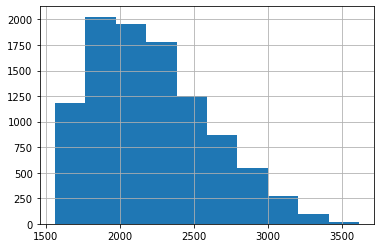

In [ ]:
pd.Series(AT).hist()

Se observa que el Costo esperado total para crear 13 colonias,entre el costo de los componentes para fabricarlas y el costo de las abejas, es de $3614 